In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from tqdm import tqdm


dimensions de X: (2, 100)
dimensions de y: (1, 100)


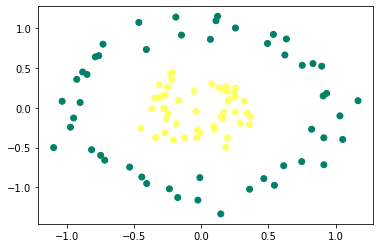

In [133]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

In [134]:
def init(dimensions):
    params = {} #dictionnaire Vide
    C = len(dimensions)

    for i in range(1,C):
        params['W' + str(i)] = np.random.randn(dimensions[i],dimensions[i-1])
        params['b' + str(i)] = np.random.randn(dimensions[i],1)
    return params

In [135]:

""" 
params = init([2,16,32,1])

for key,val in params.items():
    print(key,val.shape)
"""

' \nparams = init([2,16,32,1])\n\nfor key,val in params.items():\n    print(key,val.shape)\n'

In [136]:
def forward_propogataion(X,params):
    activations = {"A0" : X}
    C = len(params) // 2

    for i in range(1, C + 1):
        Z = params["W" + str(i)].dot(activations["A" + str(i - 1)]) + params["b" + str(i)]
        activations["A" + str(i)] = 1 / (1 + np.exp(-Z))
    return activations

In [137]:
"""
activations = forward_propogataion(X,params)

for key,val in activations.items():
    print(key,val.shape)
"""

'\nactivations = forward_propogataion(X,params)\n\nfor key,val in activations.items():\n    print(key,val.shape)\n'

In [138]:
def back_propogation(activations,params,y):
    m = y.shape[1]
    C = len(params) // 2
    dz = activations["A" + str(C)] - y
    gradients = {}

    for i in reversed(range(1 , C + 1)):
        gradients["dW" + str(i)] = 1 / m * np.dot(dz,activations["A" + str(i-1)].T)
        gradients["db" + str(i)] = 1 / m * np.sum(dz,axis=1,keepdims=True)
        dz = np.dot(params["W" + str(i)].T , dz) * activations["A" + str(i - 1)] * (1 - activations["A" + str(i -1)])
    return gradients


In [139]:
"""
gradients = back_propogation(activations,params,y)

for key,val in gradients.items():
    print(key,val.shape)
"""

'\ngradients = back_propogation(activations,params,y)\n\nfor key,val in gradients.items():\n    print(key,val.shape)\n'

In [140]:
def update(params,gradients,learning_rate):

    C = len(params) // 2

    for i in range(1 , C + 1):
        params["W" + str(i)] = params["W" + str(i)] - learning_rate * gradients["dW" + str(i)]
        params["b" + str(i)] = params["b" + str(i)] - learning_rate * gradients["db" + str(i)]
    return params

In [141]:
def cout(A,y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))


In [142]:
def prediction(X,params):
    activations = forward_propogataion(X,params)
    C = len(params) // 2
    A_fin =  activations["A" + str(C)]

    return A_fin >= 0.5

In [143]:
"""
params = update(params,gradients,0.1)

for key,val in params.items():
    print(key,val.shape)
"""

'\nparams = update(params,gradients,0.1)\n\nfor key,val in params.items():\n    print(key,val.shape)\n'

In [144]:
def deep_neural_network(X,y,couche_cachee = (10,15,20),learning_rate = 0.1,epoche =100):
    entree = X.shape[0] 
    sorti = y.shape[0]
    dimension  = list(couche_cachee)
    dimension.insert(0,entree) # on ajoute la dimension des entree
    dimension.insert(-1,sorti) # on ajoute la dimension de la sortie

    params = init(dimension) # on intialise les poids et bias de notre reseau de neurone
    loss = []
    C = len(params) // 2
    for i in tqdm(range(epoche)):
        activations = forward_propogataion(X,params) # Propogation en avant
        A_fin = activations["A" + str(C)] # la sortie de la dernier fonction d'acivation
        loss.append(cout(A_fin,y))
        gradients = back_propogation(activations,params,y) #Propogation en arriere
        params = update(params,gradients,learning_rate) # Mis ajour des poids apres avoir calculer le gradient

    plt.plot(loss, label='train loss')
    plt.legend()


100%|██████████| 100/100 [00:00<00:00, 2436.20it/s]


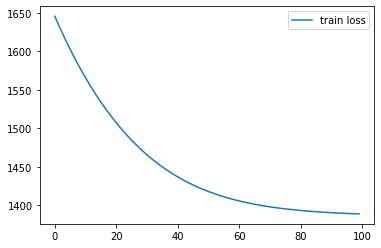

In [145]:
deep_neural_network(X,y)